In [1]:
###############
# ML Modeling #
###############

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read transformed data for ML modeling
df2 = pd.read_csv('stroke_train_transformed.csv')
# Remove unnamed column:
df2 = df2.drop(['Unnamed: 0'], axis=1)
# Check dataframe info.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42512 entries, 0 to 42511
Data columns (total 15 columns):
age                        42512 non-null float64
avg_glucose_level          42512 non-null float64
bmi                        42512 non-null float64
smoking_status             42512 non-null int64
gender_Male                42512 non-null int64
gender_Other               42512 non-null int64
hypertension_Yes           42512 non-null int64
heart_disease_Yes          42512 non-null int64
ever_married_Yes           42512 non-null int64
work_type_Never_worked     42512 non-null int64
work_type_Private          42512 non-null int64
work_type_Self-employed    42512 non-null int64
work_type_children         42512 non-null int64
Residence_type_Urban       42512 non-null int64
stroke                     42512 non-null int64
dtypes: float64(3), int64(12)
memory usage: 4.9 MB


In [2]:
# Filtered dataframe by stroke label: '0':non-stroke, '1':stroke #
###############################################################################
df_stroke_0 = df2[df2['stroke'] == 0] # only non-stroke patients
df_stroke_1 = df2[df2['stroke'] == 1] # only stroke patients

# Feature Engineering: discretization - age_group & age_group_label
###############################################################################
age_bins = [0, 30, 40, 50, 60, 70, 80, 90]
age_bin_labels = [1,2,3,4,5,6,7]

# Generate age_group and age_group_label: stroke patients population
df_stroke_1['age_group'] = pd.cut(np.array(df_stroke_1['age']),bins=age_bins) 
df_stroke_1['age_group_label'] = pd.cut(np.array(df_stroke_1['age']),bins=age_bins, labels=age_bin_labels)  
df_stroke_1['age_group'].value_counts().sort_values(ascending=True)

# Generate age_group and age_group_label: non-stroke patients population
df_stroke_0['age_group'] = pd.cut(np.array(df_stroke_0['age']),bins=age_bins) 
df_stroke_0['age_group_label'] = pd.cut(np.array(df_stroke_0['age']),bins=age_bins, labels=age_bin_labels) 

# Stratification on non-stroke patients #
###############################################################################
# Stratified by age_group_label:
df_stroke_0_age_grp1 = df_stroke_0[df_stroke_0['age_group_label'] == 1] # age: <30 
df_stroke_0_age_grp2 = df_stroke_0[df_stroke_0['age_group_label'] == 2] # age: 30-40
df_stroke_0_age_grp3 = df_stroke_0[df_stroke_0['age_group_label'] == 3] # age: 40-50
df_stroke_0_age_grp4 = df_stroke_0[df_stroke_0['age_group_label'] == 4] # age: 50-60
df_stroke_0_age_grp5 = df_stroke_0[df_stroke_0['age_group_label'] == 5] # age: 60-70
df_stroke_0_age_grp6 = df_stroke_0[df_stroke_0['age_group_label'] == 6] # age: 70-80
df_stroke_0_age_grp7 = df_stroke_0[df_stroke_0['age_group_label'] == 7] # age: 80-90

# Age group count index for non-stroke patients:
df_stroke_0_counts = df_stroke_0[['age_group','age_group_label']]
df_stroke_0_counts = pd.DataFrame(df_stroke_0_counts.groupby('age_group_label')['age_group'].count())
df_stroke_0_counts.columns = ['counts']

# Print age group count index for non-stroke patients:
print(df_stroke_0_counts)

C:\Users\yoots\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\yoots\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\yoots\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

                 counts
age_group_label        
1                 14084
2                  5321
3                  6168
4                  6371
5                  4949
6                  4038
7                   809


In [3]:
# Compute age group label proporiton % on non-stroke patients:
df_stroke_0_counts['age_group_pct'] = df_stroke_0_counts['counts']/df_stroke_0_counts['counts'].sum()
# Compute # of resampled case counts to match total # of stroke patients = 772 cases:
df_stroke_0_counts['resampled case counts'] = df_stroke_0_counts['age_group_pct'] * 772

# Stratified sampling on non-stroke patients by % composition each age group label
# to match total stroke patients = 772 cases for resampling:
#######################################################################################
# Print required # of resampled case counts from non-stroke patients:
print(df_stroke_0_counts['resampled case counts'])

age_group_label
1    260.489890
2     98.414279
3    114.079923
4    117.834499
5     91.533972
6     74.684619
7     14.962817
Name: resampled case counts, dtype: float64


In [4]:
# Import libraries for resample
from sklearn.utils import resample

df_sampled_age_grp1 = resample(df_stroke_0_age_grp1, replace=True, 
                               n_samples=260,random_state=0)
df_sampled_age_grp2 = resample(df_stroke_0_age_grp2, replace=True, 
                               n_samples=98,random_state=0)
df_sampled_age_grp3 = resample(df_stroke_0_age_grp3, replace=True, 
                               n_samples=114,random_state=0)
df_sampled_age_grp4 = resample(df_stroke_0_age_grp4, replace=True, 
                               n_samples=118,random_state=0)
df_sampled_age_grp5 = resample(df_stroke_0_age_grp5, replace=True, 
                               n_samples=92,random_state=0)
df_sampled_age_grp6 = resample(df_stroke_0_age_grp6, replace=True, 
                               n_samples=75,random_state=0)
df_sampled_age_grp7 = resample(df_stroke_0_age_grp7, replace=True, 
                               n_samples=15,random_state=0)

# Concatentate downsampled majority class '0': non-stroke patients
df_stroke_0_downsampled = pd.concat([df_sampled_age_grp1,df_sampled_age_grp2,df_sampled_age_grp3,
                                  df_sampled_age_grp4,df_sampled_age_grp5,df_sampled_age_grp6,
                                  df_sampled_age_grp7], axis=0)

# Conbine minority class '1': stroke patients with downsampled majority class:
df_downsampled = pd.concat([df_stroke_0_downsampled,df_stroke_1],axis=0)

# Display new class counts:
df_downsampled.stroke.value_counts()

1    772
0    772
Name: stroke, dtype: int64

In [5]:
# Drop unnecessary columns:
df_downsampled = df_downsampled.drop(['age_group','age_group_label'], axis=1)

# new downsampled df column names:
_ = df_downsampled.columns
_

Index(['age', 'avg_glucose_level', 'bmi', 'smoking_status', 'gender_Male',
       'gender_Other', 'hypertension_Yes', 'heart_disease_Yes',
       'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'stroke'],
      dtype='object')

In [6]:
#########################################
# QA check on input features/class label#
# Re-define input features:
X = df_downsampled.iloc[:, :-1].values
# Reduced output feature (label): stroke
y = df_downsampled['stroke'].values
# Print unique labels for stroke condition:
print('Class labels:', np.unique(y))

Class labels: [0 1]


In [7]:
###############################################################################
# General: data parition - train vs. test set
# Use built-in stratify mode to ensure equal % label splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 1/4, random_state = 0, stratify=y)

# Check label counts on the split set:
print('Class labels counts in total:', np.bincount(y))
print('Class labels counts in train set:', np.bincount(y_train))
print('Class labels counts in test set:', np.bincount(y_test)) 

Class labels counts in total: [772 772]
Class labels counts in train set: [579 579]
Class labels counts in test set: [193 193]


In [8]:
# Feature Scaling: 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() 
X_train_std = sc_X.fit_transform(X_train) 
X_test_std = sc_X.fit_transform(X_test)    

In [9]:
# Feature Selection: Recursive Feature Elimination #
# Using Logistic Regression: 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
from sklearn.feature_selection import RFE
rfe = RFE(lr, 2) 
rfe.fit(X_train_std, y_train)
print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)

Num Features: 2
Selected Features: [ True False False False False False False  True False False False False
 False False]
Feature Ranking: [ 1  2  3  5 12  9  4  1 11 13  8  7 10  6]


In [10]:
################################
# Model 1: Logistic Regression #
################################
###############################################################################
# Feature Selection by LogisticReg + RFE #
# Reduced features: age, heart_disease_yes 
X_lr = X_train_std[:, [0,7]]
y_lr = y_train

# K-fold Cross-validation: Stratified #
# Logistic Regression:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4, random_state=0)
for train_index, test_index in skf.split(X_lr, y_lr):
    print("TRAIN:", train_index,  "TEST:", test_index)
    X_train_lr, X_test_lr = X_lr[train_index], X_lr[test_index]
    y_train_lr, y_test_lr = y_lr[train_index], y_lr[test_index]

TRAIN: [ 290  291  292  293  294  295  296  297  298  299  300  301  302  303  304
  305  306  307  308  309  310  311  312  313  314  315  316  317  318  319
  320  321  322  323  324  325  326  327  328  329  330  331  332  333  334
  335  336  337  338  339  340  341  342  343  344  345  346  347  348  349
  350  351  352  353  354  355  356  357  358  359  360  361  362  363  364
  365  366  367  368  369  370  371  372  373  374  375  376  377  378  379
  380  381  382  383  384  385  386  387  388  389  390  391  392  393  394
  395  396  397  398  399  400  401  402  403  404  405  406  407  408  409
  410  411  412  413  414  415  416  417  418  419  420  421  422  423  424
  425  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453  454
  455  456  457  458  459  460  461  462  463  464  465  466  467  468  469
  470  471  472  473  474  475  476  477  478  479  480  481  482  483  484
  485

In [11]:
# Model: Logistic Regression
lr_cv = LogisticRegression(C=0.1,penalty='l1',random_state=0)
lr_cv.fit(X_train_lr, y_train_lr)

# Hyperparameters Tuning: ML Models #
# import library
from sklearn.model_selection import GridSearchCV

# GridSearchCV: LogisticRegression #
parameters_lr = [{'C': [0.01, 0.1, 1, 5, 10], 'penalty': ['l1', 'l2']}]
if __name__ == '__main__':
    grid_search_lr = GridSearchCV(estimator = lr_cv,
                               param_grid = parameters_lr,
                               scoring = 'roc_auc',
                               cv = 4,
                               n_jobs = 1)
grid_search_lr = grid_search_lr.fit(X_train_lr, y_train_lr)
best_roc_auc_lr = grid_search_lr.best_score_
best_parameters_lr = grid_search_lr.best_params_
best_parameters_lr

# Model prediction: CV testset
y_pred_test_lr = grid_search_lr.predict(X_test_lr)

# Model prediction: hold-out set 
#X_test_eval_lr = X_test_std[:, [1,7]]
#y_pred_eval_lr = lr_cv.predict(X_test_eval_lr) # unseen data

 1) age                            0.875600
 2) avg_glucose_level              0.063085
 3) bmi                            0.046727
 4) heart_disease_Yes              0.014587
 5) Residence_type_Urban           0.000000
 6) work_type_children             0.000000
 7) work_type_Self-employed        0.000000
 8) work_type_Private              0.000000
 9) work_type_Never_worked         0.000000
10) ever_married_Yes               0.000000
11) hypertension_Yes               0.000000
12) gender_Other                   0.000000
13) gender_Male                    0.000000
14) smoking_status                 0.000000


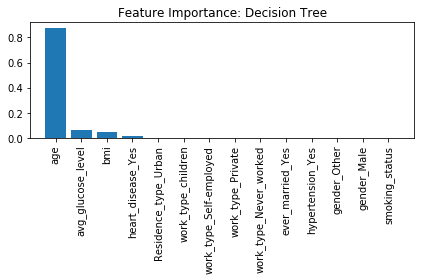

In [12]:
# Feature Selection: Feature Importance #
# Using a Decision Tree:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',
                                max_depth=4,
                                random_state=0)
feat_labels = df_downsampled.columns[:-1]
tree.fit(X_train_std, y_train)
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train_std.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.title('Feature Importance: Decision Tree')
plt.bar(range(X_train_std.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train_std.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim(-1, X_train_std.shape[1])
plt.tight_layout()
plt.show()

In [13]:
####################################
# Model 2: DecisionTree Classifier #
####################################
# Feature Selection by DT Classifier: age and avg_glucose_level
X_dt = X_train_std[:, [0,1]]
y_dt = y_train

# K-fold Cross-validation: Stratified #
# DecisionTree Classifier:
for train_index, test_index in skf.split(X_dt, y_dt):
#   print("TRAIN:", train_index,  "TEST:", test_index)
    X_train_dt, X_test_dt = X_dt[train_index], X_dt[test_index]
    y_train_dt, y_test_dt = y_dt[train_index], y_dt[test_index]

In [14]:
# Model: DecisionTree [cross-validated & std. train set]
tree_cv = DecisionTreeClassifier(criterion='gini', max_depth=8,
                                min_samples_split=2, min_samples_leaf=2,
                                random_state=0)
tree_cv.fit(X_train_dt, y_train_dt)

# GridSearchCV: DecisionTree #
parameters_dt = [{'max_depth': [1,2,4,6,8,10],'min_samples_split':[2,5,10], 
                  'min_samples_leaf':[1,2]}]
if __name__ == '__main__':
    grid_search_dt = GridSearchCV(estimator = tree_cv,
                               param_grid = parameters_dt,
                               scoring = 'roc_auc',
                               cv = 4,
                               n_jobs = 1)
grid_search_dt = grid_search_dt.fit(X_train_dt, y_train_dt)
best_roc_auc_dt = grid_search_dt.best_score_
best_parameters_dt = grid_search_dt.best_params_
best_parameters_dt

# Model prediction: CV testset
y_pred_test_dt = grid_search_dt.predict(X_test_dt)

# Model prediction: hold-out set 
#X_test_eval_dt = X_test_std[:, [0,1]]
#y_pred_eval_dt = tree_cv.predict(X_test_eval_dt) # Unseen data

 1) age                            0.360270
 2) avg_glucose_level              0.203442
 3) bmi                            0.173811
 4) heart_disease_Yes              0.043672
 5) smoking_status                 0.040315
 6) ever_married_Yes               0.038588
 7) hypertension_Yes               0.033401
 8) Residence_type_Urban           0.027201
 9) gender_Male                    0.026693
10) work_type_Self-employed        0.022055
11) work_type_Private              0.017305
12) work_type_children             0.013230
13) gender_Other                   0.000015
14) work_type_Never_worked         0.000000


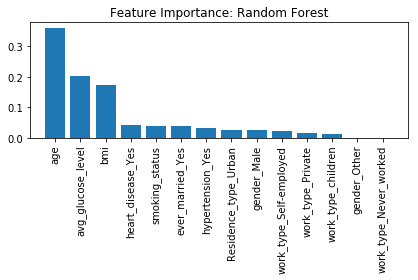

In [15]:
###############################################################################
# Feature Selection: Feature Importance #
# Using a Random Forest:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=0,
                                n_jobs=1)
feat_labels = df_downsampled.columns[:-1]
forest.fit(X_train_std, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train_std.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.figure()    
plt.title('Feature Importance: Random Forest')
plt.bar(range(X_train_std.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train_std.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim(-1, X_train_std.shape[1])
plt.tight_layout()
plt.show() 

In [16]:
####################################
# Model 3: RandomForest Classifier #
####################################
# Feature Selection by RF Classifier: age and avg_glucose_level
X_rf = X_train_std[:, [0,1]]
y_rf = y_train

# K-fold Cross-validation: Stratified #
# RandomForest Classifier:
for train_index, test_index in skf.split(X_rf, y_rf):
#   print("TRAIN:", train_index,  "TEST:", test_index)
    X_train_rf, X_test_rf = X_rf[train_index], X_rf[test_index]
    y_train_rf, y_test_rf = y_rf[train_index], y_rf[test_index]

In [17]:
# Model: RandomForest [cross-validated & std. train set]
forest_cv = RandomForestClassifier(criterion='gini',n_estimators=50,
                                max_depth=1, min_samples_split=2,
                                random_state=0, n_jobs=1)
forest_cv.fit(X_train_rf, y_train_rf)

# GridSearchCV: RandomForest #
parameters_rf = [{'n_estimators': [1,10,20,50,100], 'max_depth': [1,5,10],
                  'min_samples_split':[2,5,10]}]
if __name__ == '__main__':
    grid_search_rf = GridSearchCV(estimator = forest_cv,
                               param_grid = parameters_rf,
                               scoring = 'roc_auc',
                               cv = 4,
                               n_jobs = 1)
grid_search_rf = grid_search_rf.fit(X_train_rf, y_train_rf)
best_roc_auc_rf = grid_search_rf.best_score_
best_parameters_rf = grid_search_rf.best_params_
best_parameters_rf

# Model prediction: CV testset
y_pred_test_rf = grid_search_rf.predict(X_test_rf)

# Model prediction: hold-out set 
#X_test_eval_rf = X_test_std[:, [0,1]]
#y_pred_eval_rf = forest_cv.predict(X_test_eval_rf) # Unseen data

In [18]:
# Making the Confusion/Contingency Matrix #
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Write plot_confusion_matrix function #
def plot_confusion_matrix(cm):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i, s=cm[i,j],va='center',ha='center')
        plt.xlabel('predicted label')
        plt.ylabel('true label')
        

# Compute confusion matrix on Stratified K-fold test set: 3 ML modelings
cm_test_lr = confusion_matrix(y_test_lr, y_pred_test_lr)  
cm_test_dt = confusion_matrix(y_test_dt, y_pred_test_dt)  
cm_test_rf = confusion_matrix(y_test_rf, y_pred_test_rf)  

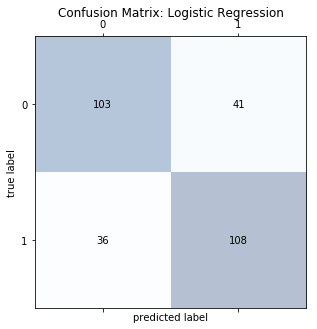

Precision: 0.725
Recall: 0.750


In [19]:
# Plot confusion matrix on test set: LogisticRegression
###############################################################
plot_confusion_matrix(cm_test_lr)
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

# Report Precision, Recall on test set: LogisticRegression
print('Precision: %.3f' % precision_score(
y_true=y_test_lr, y_pred=y_pred_test_lr))
print('Recall: %.3f' % recall_score(
y_true=y_test_lr, y_pred=y_pred_test_lr))

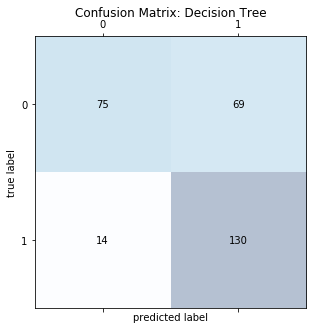

Precision: 0.653
Recall: 0.903


In [20]:
# Plot confusion matrix on test set: DecisionTree
###############################################################
plot_confusion_matrix(cm_test_dt)
plt.title('Confusion Matrix: Decision Tree')
plt.show()

# Report Precision, Recall on test set: DecisionTree
print('Precision: %.3f' % precision_score(
y_true=y_test_dt, y_pred=y_pred_test_dt))
print('Recall: %.3f' % recall_score(
y_true=y_test_dt, y_pred=y_pred_test_dt))

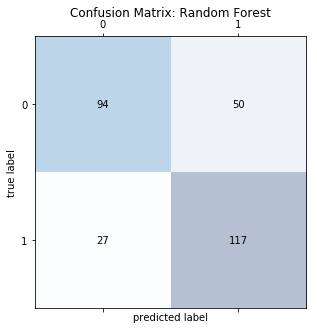

Precision: 0.701
Recall: 0.812


In [21]:
# Plot confusion matrix on test set: RandomForest
###############################################################
plot_confusion_matrix(cm_test_rf)
plt.title('Confusion Matrix: Random Forest')
plt.show()

# Report Precision, Recall on test set: RandomForest
print('Precision: %.3f' % precision_score(
y_true=y_test_rf, y_pred=y_pred_test_rf))
print('Recall: %.3f' % recall_score(
y_true=y_test_rf, y_pred=y_pred_test_rf))

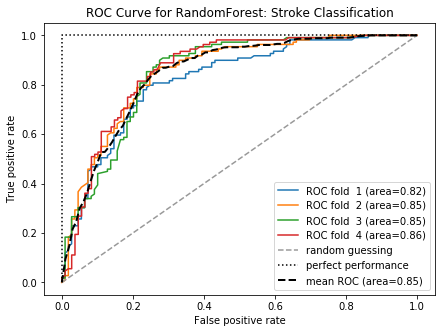

In [27]:
###############################################################
# Plotting ROC Curve #
# Random Forest: ROC fold and Mean ROC
from sklearn.metrics import roc_curve, auc
from scipy import interp

cv = list(skf.split(X_train_rf, y_train_rf))
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_trp = []

for i, (train,test) in enumerate(cv):
    prob = grid_search_rf.fit(X_train_rf[train],y_train_rf[train]).predict_proba(X_train_rf[test])
    fpr,tpr,thresholds = roc_curve(y_train_rf[test],
                                   prob[:,1],
                                   pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label='ROC fold % d (area=%0.2f)' % (i+1, roc_auc))
    
plt.plot([0,1],[0,1],linestyle='--',
    color=(0.6,0.6,0.6),label='random guessing')

plt.plot([0,0,1],[0,1,1],linestyle=':',
    color='black',label='perfect performance')
    
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr,mean_tpr)
    
plt.plot(mean_fpr,mean_tpr,'k--',
    label='mean ROC (area=%0.2f)' % mean_auc, lw=2)
        
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve for RandomForest: Stroke Classification')
plt.legend(loc='lower right')
plt.show()

In [23]:
###############################################################
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Write plot_decision_regions function #
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # Setup marker generator and colormap
    markers = ('o','o','s','^','v')
    colors = ('red','green','blue','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot decision surface
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolor='black')

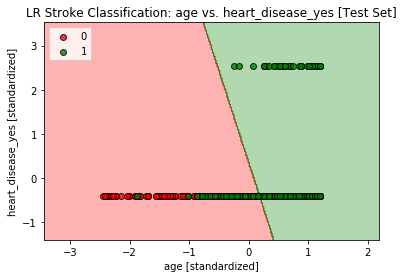

In [24]:
# Visualize stroke classification: Logistic Regression #
# Downsampled CV: test set
plt.figure()
plot_decision_regions(X=X_test_lr, y=y_test_lr, classifier=grid_search_lr, test_idx=None)
plt.title('LR Stroke Classification: age vs. heart_disease_yes [Test Set]')
plt.xlabel('age [standardized]')
plt.ylabel('heart_disease_yes [standardized]')
plt.legend(loc='upper left')
plt.show()        

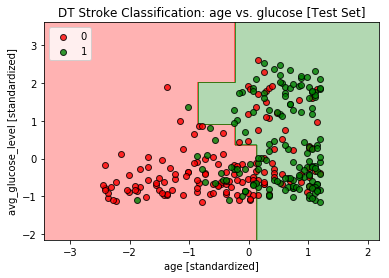

In [25]:
# Visualize stroke classification: Decision Tree #
# Downsampled CV: test set
plt.figure()
plot_decision_regions(X=X_test_dt, y=y_test_dt, classifier=grid_search_dt, test_idx=None)
plt.title('DT Stroke Classification: age vs. glucose [Test Set]')
plt.xlabel('age [standardized]')
plt.ylabel('avg_glucose_level [standardized]')
plt.legend(loc='upper left')
plt.show()

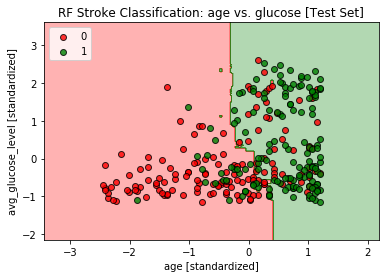

In [26]:
# Visualize stroke classification: Random Forest #
# Downsampled CV: test set
plt.figure()
plot_decision_regions(X=X_test_rf, y=y_test_rf, classifier=grid_search_rf, test_idx=None)
plt.title('RF Stroke Classification: age vs. glucose [Test Set]')
plt.xlabel('age [standardized]')
plt.ylabel('avg_glucose_level [standardized]')
plt.legend(loc='upper left')
plt.show()